Assignment: Project-2- Hypothesis Testing submitted by Subodh Nath Pushpak
---
Objective:
To dive deep into the  data to find some valuable insights.
---
Domain: Healthcare

# **Exploratory Data analysis (EDA)**

1. Import the necessary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import copy

2. Read the data as a data frame

In [5]:
insurance_df  = pd.read_csv('/insurance.csv') # Import the dataset named 'insurance.csv'
insurance_df.head()  # view the first 5 rows of the data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Perform basic EDA which should include the following
and print out your insights at every step.



> a. Shape of the data



In [6]:
rows, cols = insurance_df.shape # see the shape of the data
print (f"There are {rows} observations / rows and {cols} attributes / columns")

There are 1338 observations / rows and 7 attributes / columns


> b. Data type of each attribute

In [7]:
insurance_df.info() # Info on  the data type of each of the variable, number of values entered in each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data has 1338 instances with 7 attributes / columns. 2 integer type, 2 float type and 3 object type (Strings)

> c. Checking the presence of missing values

In [8]:
insurance_df.isna().sum()  # get the sum of na values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values in the dataset

> d. 5 point summary of numerical attributes



In [9]:
#Five point summary for the dataset
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801




*  The data seems to be logically OK and statistics seem reasonable
*  The age column, data seems to be  representative of the true age distribution of the adult population
*  Few people have more than 2 children. About 75% of the people have 2 or less children
*  The charges column higly skewed
*  The average, medical cost is USD 13,270 with a median value of USD 9382.




In [10]:
# get the mode
print("insurance_df mode: ",(insurance_df.mode()).T) 
# insurance_df["children"].value_counts() # analyse if mode of given column is correct

insurance_df mode:                    0
age              18
sex            male
bmi            32.3
children          0
smoker           no
region    southeast
charges     1639.56


*  People with age 18 occurs most  
*  Most people come from southeast region
*  Most people are having 0 children

In [11]:
# get the median of the data
print("insurance_df median: \n",insurance_df.median()) 

insurance_df median: 
 age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


The charges mean (13270.422) varies considerably than median (9382.033)

> Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

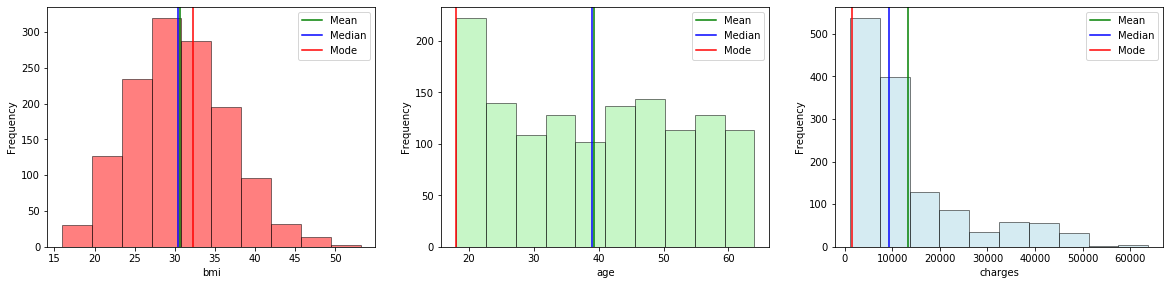

In [12]:
plt.figure(figsize= (20,15))


plt.subplot(3,3,1)
plt.hist(insurance_df.bmi,color='red', edgecolor = 'black', alpha = 0.5)
plt.ylabel('Frequency') # label the y-axis
plt.xlabel('bmi')
plt.axvline(insurance_df.bmi.mean(),color='green',label='Mean')  
plt.axvline(insurance_df.bmi.median(),color='blue',label='Median')
plt.axvline(insurance_df.bmi.mode()[0],color='red',label='Mode')
plt.legend()  

plt.subplot(3,3,2)
plt.hist(insurance_df.age, color='lightgreen', edgecolor = 'black', alpha = 0.5)
plt.ylabel('Frequency') # label the y-axis
plt.xlabel('age')
plt.axvline(insurance_df.age.mean(),color='green',label='Mean')  
plt.axvline(insurance_df.age.median(),color='blue',label='Median')
plt.axvline(insurance_df.age.mode()[0],color='red',label='Mode')
plt.legend()  

plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color='lightblue', edgecolor = 'black', alpha = 0.5)
plt.ylabel('Frequency') # label the y-axis
plt.xlabel('charges')
plt.axvline(insurance_df.charges.mean(),color='green',label='Mean')  
plt.axvline(insurance_df.charges.median(),color='blue',label='Median')
plt.axvline(insurance_df.charges.mode()[0],color='red',label='Mode')
plt.legend()     # Plot the legend
         

plt.show()

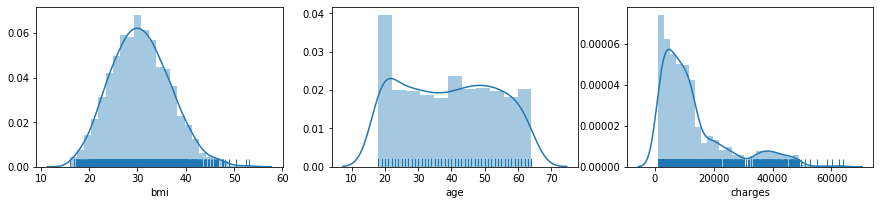

In [112]:
plt.figure(figsize= (15,10))
plt.subplot(3,3,1)
sns.distplot(insurance_df[('bmi')], kde=True, rug = True )
plt.subplot(3,3,2)
sns.distplot(insurance_df[('age')], kde=True, rug = True )
plt.subplot(3,3,3)
sns.distplot(insurance_df[('charges')], kde=True, rug = True )


* bmi is almost normally distributed
* Age is uniformly normally
* Charges are highly skewed


> f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges columns

In [14]:
skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_df.bmi),stats.skew(insurance_df.age),stats.skew(insurance_df.charges)]},
                        index=['bmi','age','charges'])  
print("Measure of skewness is: \n")
skewness

Measure of skewness is: 



,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


* Less skew in bmi
* Very small skew in age
* charges are highly skewed

> g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns

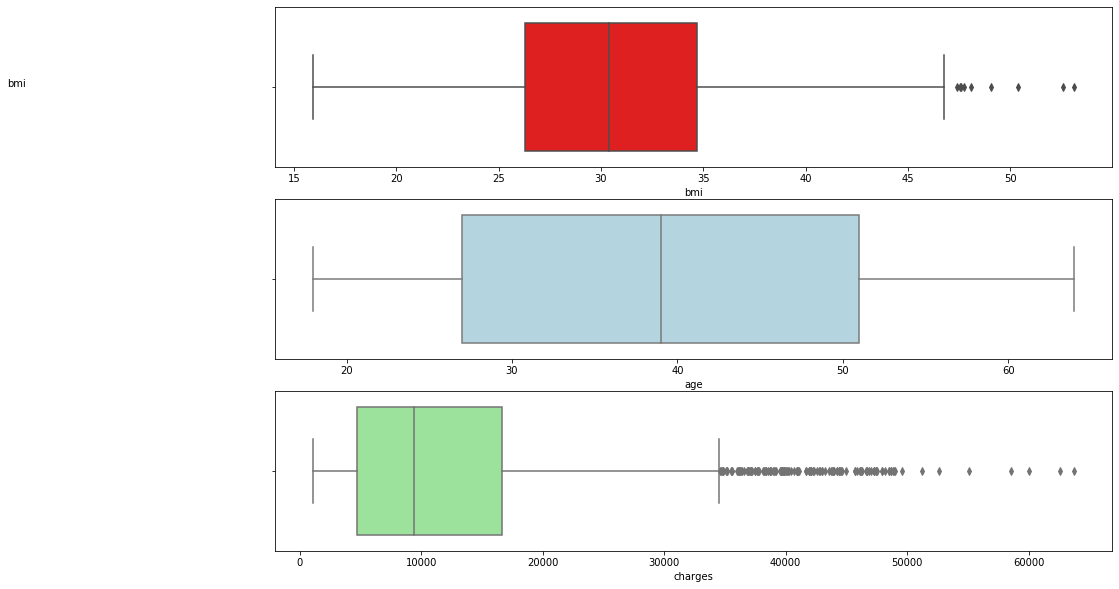

In [25]:
#Checking for the outliers
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df.bmi, color='red')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_df.charges, color='lightgreen')

plt.show()

* bmi has a few extreme values
* Negligible extreme values in age
* charges as it is highly skewed, there are quiet a lot of extreme values

> h. Distribution of categorical columns (include  children) 

In [26]:
insurance_df.info() # get info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical columns are sex, smoker, region and including children as per question

In [0]:
def plotBarGraph(xValues, yValues, graphName):
  x1 = xValues    #Values for x-axis
  y1 = yValues   # Count of each class on y-axis

  #plt.subplot(4,2,2)
  plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
  plt.xlabel(graphName)
  plt.ylabel('Count')
  plt.title(graphName + ' distribution')

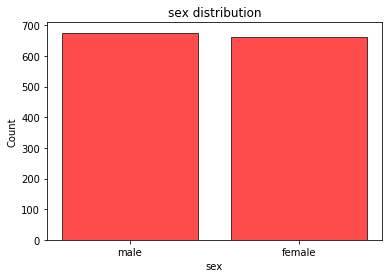

In [33]:
x1 = insurance_df.sex.value_counts().index    #Values for x-axis
y1 = [insurance_df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis
plotBarGraph(x1,y1,'sex')

* Gender is equally distributed

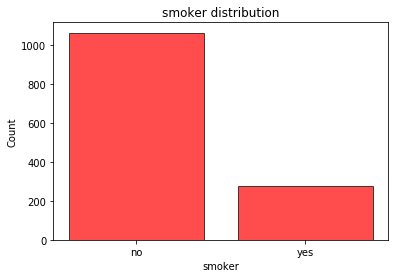

In [34]:
x1 = insurance_df.smoker.value_counts().index    #Values for x-axis
y1 = [insurance_df['smoker'].value_counts()[j] for j in x1]   # Count of each class on y-axis
plotBarGraph(x1,y1,'smoker')

* There are a alomst 4 times non-smaokers than smokers in the data

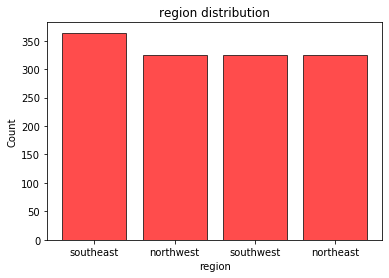

In [35]:
x1 = insurance_df.region.value_counts().index    #Values for x-axis
y1 = [insurance_df['region'].value_counts()[j] for j in x1]   # Count of each class on y-axis
plotBarGraph(x1,y1,'region')

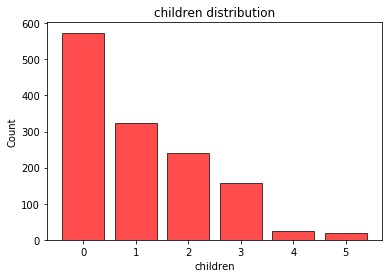

In [36]:
x1 = insurance_df.children.value_counts().index    #Values for x-axis
y1 = [insurance_df['children'].value_counts()[j] for j in x1]   # Count of each class on y-axis
plotBarGraph(x1,y1,'children')

* Most people have no children
* People with 4 or more children are very less

> i. Pair plot that includes all the columns of the data  frame  

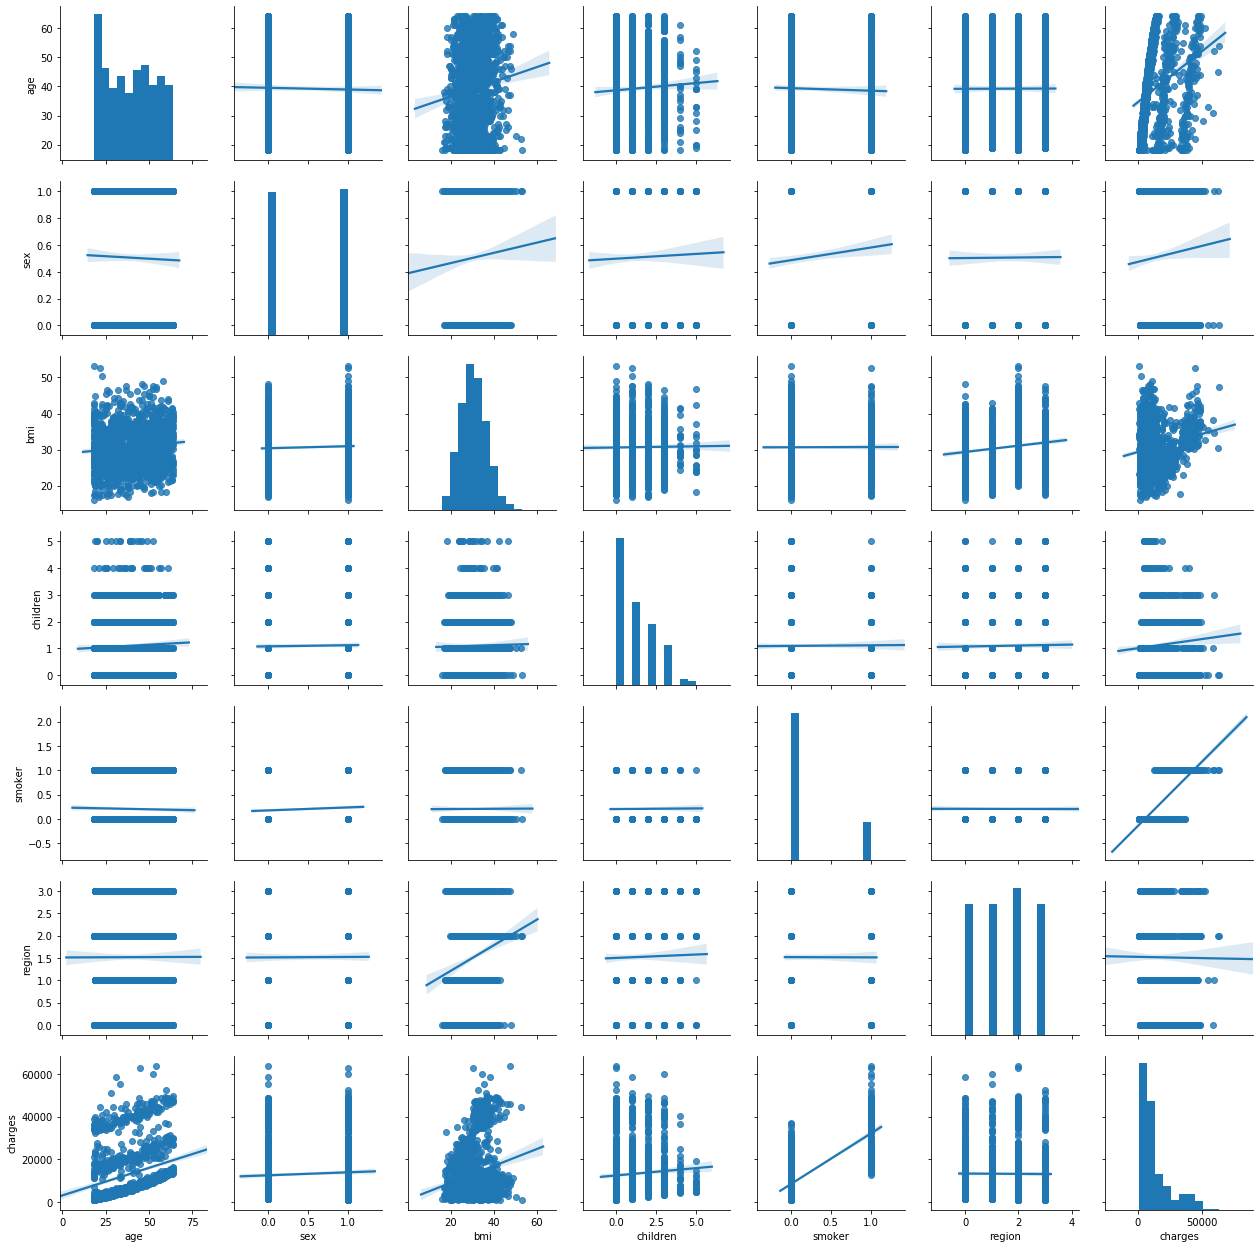

In [45]:
# since it is ALL the columns, conerting categorical data to variable
insurance_df_withAllcolumns = copy.deepcopy(insurance_df)
insurance_df_withAllcolumns.loc[:,['sex', 'smoker', 'region']] = insurance_df_withAllcolumns.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
#insurance_df_withAllcolumns
insurance_df_withAllcolumns.describe().T
sns.pairplot(insurance_df_withAllcolumns, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

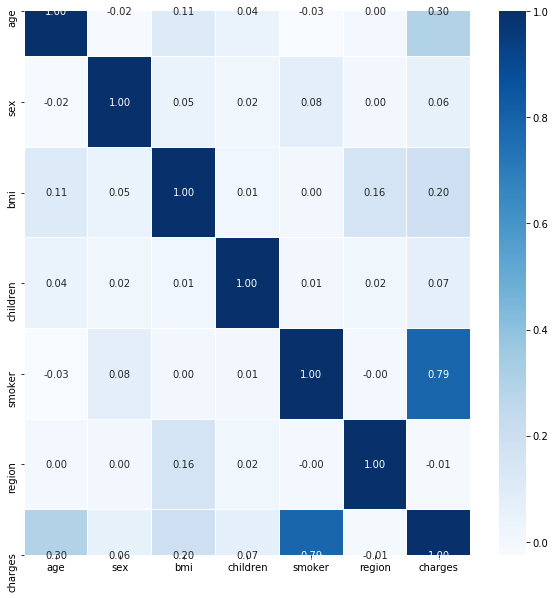

In [53]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(insurance_df_withAllcolumns.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="Blues") # the color intensity is based on 
plt.show()

* Strong correlation (0.79) between 'charges' and 'smoker' and  smokers charge is more than non-smokers
* Correlation between age and charges (.30)

**4. Answer the following questions with statistical evidence** 
> 

>a. Do charges of people who smoke differ significantly  from the people who don't? 

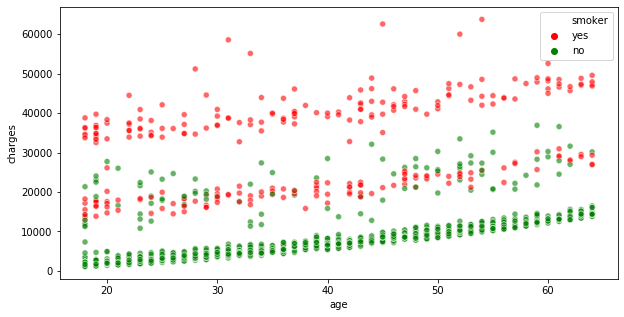

In [54]:
#Scatter plot to determine chanrges between smoker and charges accross different ages
plt.figure(figsize=(10,5))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

* The people who smoke are charged significantly more than who dont as we can observe from plot above

> b. Does bmi of males differ significantly from that of  females? 

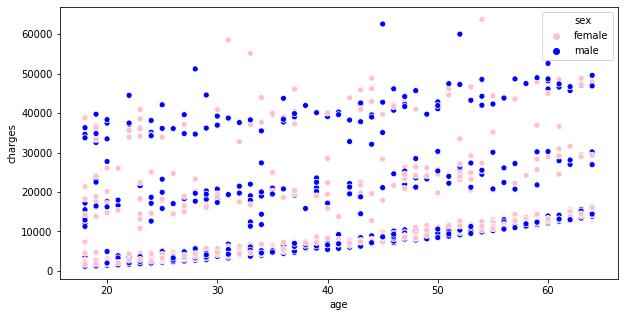

In [55]:
plt.figure(figsize=(10,5))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.sex,palette= ['pink','blue'] )
plt.show()

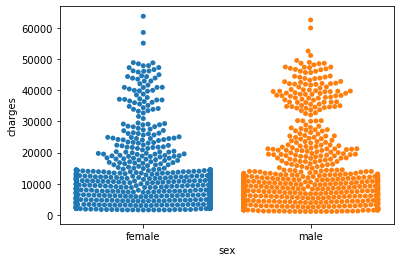

In [86]:
sns.swarmplot(insurance_df['sex'], insurance_df['charges']) #swarmpplot for distibution #ordered set of dotst

> There is no apparent releation between charges and sex. 
We can also do hypothesis checking for same. 

> T-test to check dependency of bmi on gender

* Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
* Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

In [58]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.sex == 'male'].bmi)  # Selecting bmi values for males
y = np.array(insurance_df[insurance_df.sex == 'female'].bmi) # Selecting bmi values for females

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting  significance level at 5%
    print(f'As the p_value ({p_value}) < 0.05. Refuse to accept null hypothesis.  {Ha}')
else:
    print(f'As the p_value ({p_value}) > 0.05. Accept null hypothesis. {Ho}')

As the p_value (0.09) > 0.05. Accept null hypothesis. Gender has no effect on bmi


>c. Is the proportion of smokers significantly different  in different genders?  

In [63]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(crosstab)

if p_value < 0.05:  # Setting  significance level at 5%
    print(f'As the p_value ({p_value}) < 0.05. Refuse to accept null hypothesis.  {Ha}')
else:
    print(f'As the p_value ({p_value}) > 0.05. Accept null hypothesis. {Ho}')


smoker   no  yes
sex             
female  547  115
male    517  159
As the p_value (0.006548143503580696) < 0.05. Refuse to accept null hypothesis.  Gender has an effect on smoking habits


> d. Is the distribution of bmi across women with no  children, one child and two children, the same ? 

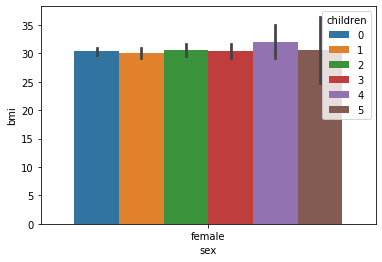

In [105]:
sns.barplot(insurance_df[insurance_df['sex'] == 'female']['sex'],
            insurance_df[insurance_df['sex'] == 'female']['bmi'], hue=insurance_df['children'])

In [91]:
# Determine the distributions of bmi values for females having different number of children, are significantly different

Ho = "bmi across women with no children, one child and two children is same"   # Stating the Null Hypothesis
Ha = "bmi across women with no children, one child and two children is not same"   # Stating the Alternate Hypothesis

female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

bmi_zero_children = female_df[female_df.children == 0]['bmi']
bmi_one_children = female_df[female_df.children == 1]['bmi']
bmi_two_children = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(bmi_zero_children,bmi_one_children,bmi_two_children)
if p_value < 0.05:  # Setting  significance level at 5%
    print(f'As the p_value ({p_value}) < 0.05. Refuse to accept null hypothesis.  {Ha}')
else:
    print(f'As the p_value ({p_value}) > 0.05. Accept null hypothesis. {Ho}')


As the p_value (0.7158579926754841) > 0.05. Accept null hypothesis. bmi across women with no children, one child and two children is same
